# Title

Your project description.


### Data Download

Download of smard energy data form smard.de, directly:

https://github.com/bundesAPI/smard-api/blob/main/python-client/README.md



In [34]:
import time
from deutschland import smard
from deutschland.smard.api import default_api
from deutschland.smard.model.indices import Indices
from pprint import pprint
# Defining the host is optional and defaults to https://www.smard.de/app
# See configuration.py for a list of all supported configuration parameters.
configuration = smard.Configuration(
    host = "https://www.smard.de/app"
)


# Enter a context with an instance of the API client
with smard.ApiClient() as api_client:
    # Create an instance of the API class
    api_instance = default_api.DefaultApi(api_client)
    filter = 1223 # int | Mögliche Filter:   * `1223` - Stromerzeugung: Braunkohle   * `1224` - Stromerzeugung: Kernenergie   * `1225` - Stromerzeugung: Wind Offshore   * `1226` - Stromerzeugung: Wasserkraft   * `1227` - Stromerzeugung: Sonstige Konventionelle   * `1228` - Stromerzeugung: Sonstige Erneuerbare   * `4066` - Stromerzeugung: Biomasse   * `4067` - Stromerzeugung: Wind Onshore   * `4068` - Stromerzeugung: Photovoltaik   * `4069` - Stromerzeugung: Steinkohle   * `4070` - Stromerzeugung: Pumpspeicher   * `4071` - Stromerzeugung: Erdgas   * `410` - Stromverbrauch: Gesamt (Netzlast)   * `4359` - Stromverbrauch: Residuallast   * `4387` - Stromverbrauch: Pumpspeicher   * `4169` - Marktpreis: Deutschland/Luxemburg   * `5078` - Marktpreis: Anrainer DE/LU   * `4996` - Marktpreis: Belgien   * `4997` - Marktpreis: Norwegen 2   * `4170` - Marktpreis: Österreich   * `252` - Marktpreis: Dänemark 1   * `253` - Marktpreis: Dänemark 2   * `254` - Marktpreis: Frankreich   * `255` - Marktpreis: Italien (Nord)   * `256` - Marktpreis: Niederlande   * `257` - Marktpreis: Polen   * `258` - Marktpreis: Polen   * `259` - Marktpreis: Schweiz   * `260` - Marktpreis: Slowenien   * `261` - Marktpreis: Tschechien   * `262` - Marktpreis: Ungarn   * `3791` - Prognostizierte Erzeugung: Offshore   * `123` - Prognostizierte Erzeugung: Onshore   * `125` - Prognostizierte Erzeugung: Photovoltaik   * `715` - Prognostizierte Erzeugung: Sonstige   * `5097` - Prognostizierte Erzeugung: Wind und Photovoltaik   * `122` - Prognostizierte Erzeugung: Gesamt 

    # example passing only required values which don't have defaults set
    try:
        # Indizes
        api_response = api_instance.chart_data_filter_region_index_resolution_json_get(filter, )
        api_responsee = api_response.get('timestamps')
        print(api_responsee)
        pprint(api_response)
    except smard.ApiException as e:
        print("Exception when calling DefaultApi->chart_data_filter_region_index_resolution_json_get: %s\n" % e)

[1419807600000, 1420412400000, 1421017200000, 1421622000000, 1422226800000, 1422831600000, 1423436400000, 1424041200000, 1424646000000, 1425250800000, 1425855600000, 1426460400000, 1427065200000, 1427666400000, 1428271200000, 1428876000000, 1429480800000, 1430085600000, 1430690400000, 1431295200000, 1431900000000, 1432504800000, 1433109600000, 1433714400000, 1434319200000, 1434924000000, 1435528800000, 1436133600000, 1436738400000, 1437343200000, 1437948000000, 1438552800000, 1439157600000, 1439762400000, 1440367200000, 1440972000000, 1441576800000, 1442181600000, 1442786400000, 1443391200000, 1443996000000, 1444600800000, 1445205600000, 1445814000000, 1446418800000, 1447023600000, 1447628400000, 1448233200000, 1448838000000, 1449442800000, 1450047600000, 1450652400000, 1451257200000, 1451862000000, 1452466800000, 1453071600000, 1453676400000, 1454281200000, 1454886000000, 1455490800000, 1456095600000, 1456700400000, 1457305200000, 1457910000000, 1458514800000, 1459116000000, 145972080

In [35]:
import time
import pandas as pd
from datetime import datetime
from deutschland import smard
from pprint import pprint
from deutschland.smard.api import default_api

# Define API Configuration
configuration = smard.Configuration(host="https://www.smard.de/app")

# Define parameters

filters = [1225, 4067]  # Stromerzeugung: Wind Offshore (1225) & Wind Onshore (4067)
region = "DE"
resolution = "hour"

# Enter a context with an instance of the API client
with smard.ApiClient(configuration) as api_client:
    api_instance = default_api.DefaultApi(api_client)
    
    all_columns = []  # List to store combined results
    

    for filter_value in filters:
        
        all_timestamps = []  # List to store combined results
        
        for timestamp in api_responsee[1:-1]:

            api_response = api_instance.chart_data_filter_region_filter_copy_region_copy_resolution_timestamp_json_get(
                filter=filter_value, filter_copy=filter_value, 
                region=region, region_copy=region, 
                resolution=resolution, timestamp=timestamp
            )
            
            values_df= pd.DataFrame(
                api_response.get("series"),
                columns= ["timestamps",filter_value]
            )
            values_df.index = [datetime.fromtimestamp(timestamp/1e3) for timestamp in values_df.loc [:,"timestamps"].tolist()]

            values_df.drop("timestamps",axis=1,inplace=True)
                 
            
            all_timestamps.append(values_df)
            
        time_df = pd.concat(all_timestamps,axis=0)
        
        all_columns.append(time_df)
        
    all_df = pd.concat(all_columns,axis=1)

# return all_df

In [1]:
import sys
import os
file='applied_programming_WS24-25-25'
ROOT_DIR = os.path.abspath(os.path.join(os.path.dirname(file), '..', '..'))
sys.path.append(ROOT_DIR)

In [2]:
import importlib
import applied_programming.khodke_s.smard_api as sa
_=importlib.reload(sa)

ModuleNotFoundError: No module named 'applied_programming'

In [36]:
all_df

,1225,4067
2015-01-05 00:00:00,473.75,11847.25
2015-01-05 01:00:00,464.75,11814.75
2015-01-05 02:00:00,461.50,12198.75
2015-01-05 03:00:00,450.25,12312.75
2015-01-05 04:00:00,453.50,13093.50
...,...,...
2025-01-26 19:00:00,5502.50,17287.50
2025-01-26 20:00:00,5441.75,20224.25
2025-01-26 21:00:00,5407.50,23111.00
2025-01-26 22:00:00,5223.50,24455.50


### Data Handling

Putting together the data using pandas.

https://pandas.pydata.org/docs/reference/frame.html

### Visualize and present the data

Select "story" and show using visualization from matplotlib/seaborn.

https://seaborn.pydata.org/examples/index.html

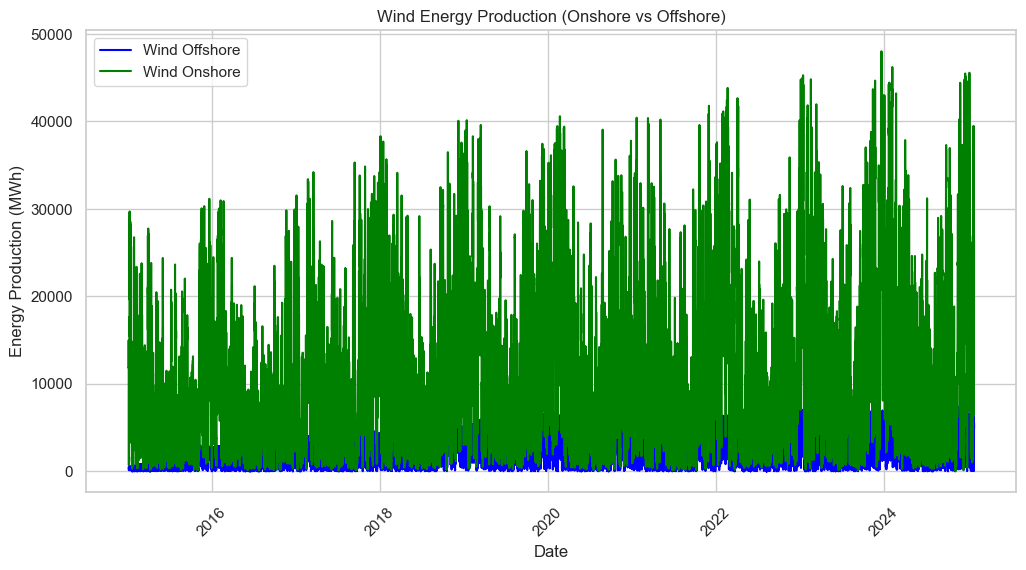

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(all_df.index, all_df[1225], label="Wind Offshore", color='blue')
plt.plot(all_df.index, all_df[4067], label="Wind Onshore", color='green')
plt.xlabel("Date")
plt.ylabel("Energy Production (MWh)")
plt.title("Wind Energy Production (Onshore vs Offshore)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


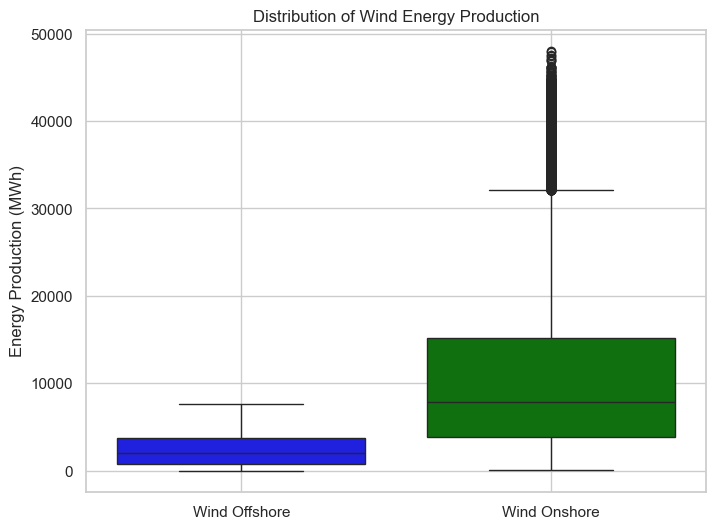

In [32]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=all_df, palette=["blue", "green"])
plt.xticks(ticks=[0, 1], labels=["Wind Offshore", "Wind Onshore"])
plt.ylabel("Energy Production (MWh)")
plt.title("Distribution of Wind Energy Production")
plt.grid(True)
plt.show()



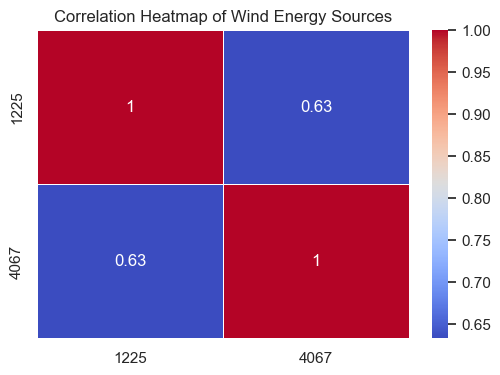

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(all_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Wind Energy Sources")
plt.show()
